In [1]:
import pandas as pd
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [2]:
train = pd.read_csv('./LP-IV-datasets/CIFR(Ass2&3)/train_data.csv')
test = pd.read_csv('./LP-IV-datasets/CIFR(Ass2&3)/test_data.csv')

In [3]:
train

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071,label
0,59,62,63,43,46,45,50,48,43,68,...,216,184,140,151,118,84,123,92,72,6
1,154,177,187,126,137,136,105,104,95,102,...,143,133,139,143,134,142,143,133,144,9
2,255,255,255,253,253,253,253,253,253,253,...,78,85,83,79,85,83,80,86,84,9
3,28,25,10,37,34,19,38,35,20,42,...,54,47,28,63,56,37,72,65,46,4
4,170,180,198,168,178,196,177,185,203,183,...,75,79,82,71,75,78,73,77,80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,145,161,194,151,166,199,156,171,205,155,...,39,41,56,36,38,53,37,39,54,2
49996,255,245,132,254,247,134,255,249,137,254,...,249,174,79,252,181,81,253,181,76,6
49997,35,178,235,40,176,239,42,176,241,39,...,27,52,77,21,43,66,12,31,50,9
49998,189,211,240,186,208,236,185,207,235,184,...,195,184,169,196,189,171,195,190,171,1


In [4]:
test

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071,label
0,158,112,49,159,111,47,165,116,51,166,...,24,77,124,34,84,129,21,67,110,3
1,235,235,235,231,231,231,232,232,232,232,...,168,183,178,180,195,191,186,200,199,8
2,158,190,222,158,187,218,139,166,194,132,...,5,6,8,4,5,3,7,8,7,8
3,155,156,149,167,176,187,176,179,193,190,...,60,63,50,64,65,52,73,68,50,0
4,65,68,50,70,81,64,48,64,46,30,...,143,179,136,154,185,146,128,156,117,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,76,78,133,76,78,134,77,80,132,76,...,204,219,236,200,215,234,199,216,236,8
9996,81,57,43,91,69,53,98,75,63,106,...,155,139,129,171,167,147,167,164,160,3
9997,20,15,12,19,14,11,15,14,11,15,...,24,23,50,26,23,53,25,20,47,5
9998,25,40,12,15,36,3,23,41,18,17,...,93,124,80,95,123,81,92,120,80,1


In [5]:
x_train = train.drop(['label'],axis = 1).values
y_train = train['label'].values

In [7]:
x_test = test.drop(['label'],axis = 1).values
y_test = test['label'].values

In [8]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [9]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [10]:
x_train = x_train.reshape(x_train.shape[0],-1)
x_test = x_test.reshape(x_test.shape[0],-1)

In [11]:
model = Sequential()
model.add(Dense(128,input_shape = (3072,),activation = 'relu'))
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation = 'softmax'))
model.compile(optimizer = 'sgd', metrics = ['accuracy'], loss = SparseCategoricalCrossentropy())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 402250 (1.53 MB)
Trainable params: 402250 (1.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
H = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs = 25)

Epoch 1/25
1563/1563 [==============================] - 9s 5ms/step - loss: 1.9774 - accuracy: 0.2811 - val_loss: 1.7909 - val_accuracy: 0.3698
Epoch 2/25
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8055 - accuracy: 0.3539 - val_loss: 1.7160 - val_accuracy: 0.3904
Epoch 3/25
1563/1563 [==============================] - 7s 4ms/step - loss: 1.7318 - accuracy: 0.3801 - val_loss: 1.6464 - val_accuracy: 0.4176
Epoch 4/25
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6893 - accuracy: 0.3990 - val_loss: 1.6442 - val_accuracy: 0.4244
Epoch 5/25
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6468 - accuracy: 0.4140 - val_loss: 1.7188 - val_accuracy: 0.3954
Epoch 6/25
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6164 - accuracy: 0.4268 - val_loss: 1.5934 - val_accuracy: 0.4309
Epoch 7/25
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5905 - accuracy: 0.4372 - val_loss: 1.5530 - val_accuracy:

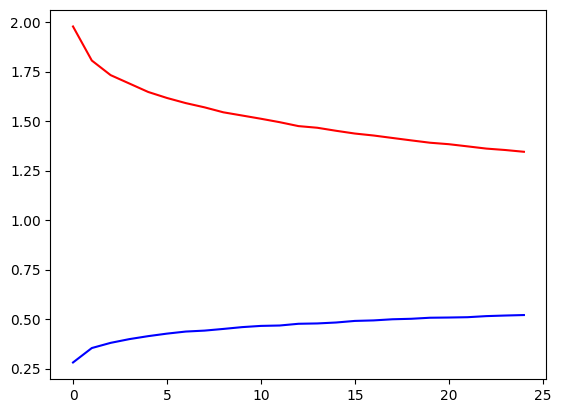

In [14]:
import matplotlib.pyplot as plt
plt.plot(H.history['accuracy'],color = 'blue')
plt.plot(H.history['loss'],color = 'red')

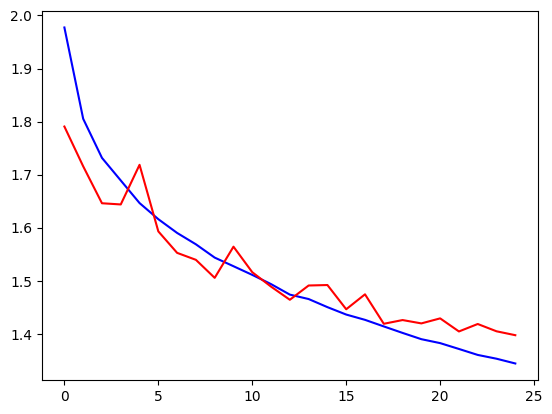

In [15]:
plt.plot(H.history['loss'],color = 'blue')
plt.plot(H.history['val_loss'],color = 'red')